In [2]:
from langgraph.graph import StateGraph, START ,END
from typing import TypedDict

In [14]:
class BMIState(TypedDict):
    weight:float
    height:float
    bmi:float
    result:str

In [15]:
graph=StateGraph(BMIState)

def calculateBmi(state:BMIState)->BMIState:
    weight=state['weight']
    height=state['height']

    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state

def  calculateResult(state:BMIState)->BMIState:
    bmi=state['bmi']
    if(bmi>25):
        state['result']='fat'
    else:
        state['result']='fit'

    return state


graph.add_node('calculateBmi',calculateBmi)
graph.add_node('result',calculateResult)
graph.add_edge(START,'calculateBmi')
graph.add_edge('calculateBmi','result')
graph.add_edge('result',END)

workflow=graph.compile()

final= workflow.invoke({'weight':80,'height':1.78})

print(final)

{'weight': 80, 'height': 1.78, 'bmi': 25.25, 'result': 'fat'}


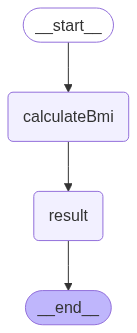

In [16]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())